W 999999.9999999999
H 2000000.0
W/H 0.49999999999999994
Solution: 0.38196600863933367
J_mt -6.180339913606662e-07
J_diff -6.180339866377363e-07


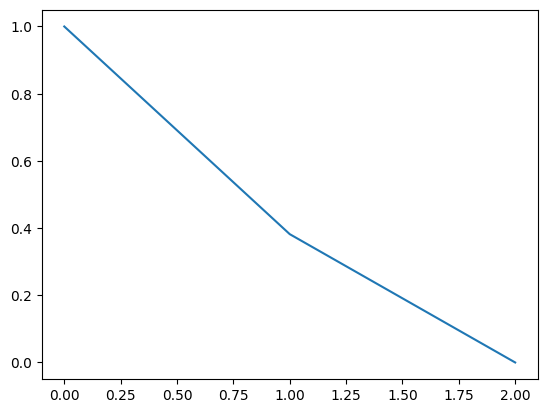

In [51]:

from scipy.optimize import fsolve
import tools.molten_salts as ms
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton_krylov
import tools.liquid_metals as lm
c0=1
k_r=1
K_H=1
D=1E-9
K_S=1
k_t=0.5E-6
thick=1E-3
k_d=1
H=ms.H(k_t,K_H,k_d)

W=lm.W(k_r=k_r, D=D, thick=thick, K_S=K_S, P_H2=c0/K_H)
print("W",W)
print("H",H)
print("W/H",W/H)

from calendar import c
def equations(vars):
    c_wl = vars
    
    c_bl=c0
    J_mt=2*k_t*(c_bl-c_wl)
    
    #J_d=k_d*(c_wl/K_H)
    J_diff=D/thick*(K_S*(c_wl/K_H)**0.5)
    eq1 = J_mt/J_diff-1
    
    
    return [eq1]

initial_guess = [(c0)]
solution = newton_krylov(equations, initial_guess,maxiter=int(1E5), method='bicgstab')
#solution=fsolve(equations, initial_guess, xtol=1e-8)
# # Check if the solution converged
# if ier != 1:
#     print(f"fsolve did not converge. The reason is: {msg}")
# else:
#     print("fsolve successfully converged.")
c_wl=solution[0]
c_bl=c0
J_mt=2*k_t*(c_wl-c_bl)

#J_d=k_d*(c_wl/K_H)
J_diff=-D*K_S/thick*((c_wl/K_H)**0.5)
print("Solution:", c_wl)
print("J_mt",J_mt)

print("J_diff",J_diff)
P_Hb=c0/K_H
P_Hlw=c_wl/K_H
plt.plot([0,1,2],[P_Hb,P_Hlw,0])




W 1e-05
H 1.0
W/H 1e-05
Solution: 0.6666666665116892
J_mt -0.6666666669766217
J_surf 0.6666666665116892


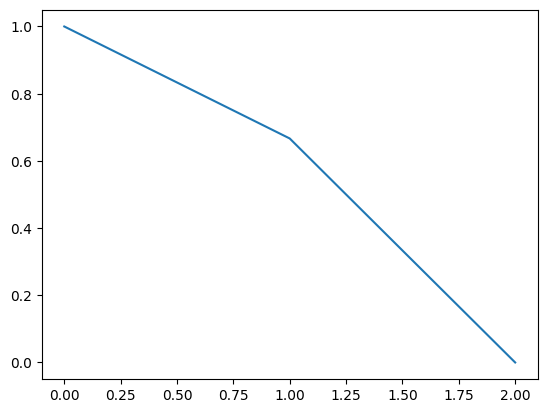

In [52]:
##mixed surface mass transfer

from scipy.optimize import fsolve
import tools.molten_salts as ms
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton_krylov
import tools.liquid_metals as lm
c0=1
k_r=1
K_H=1
D=100
K_S=1
k_t=1
thick=1E-3
k_d=1
H=ms.H(k_t,K_H,k_d)

W=lm.W(k_r=k_r, D=D, thick=thick, K_S=K_S, P_H2=c0/K_H)
print("W",W)
print("H",H)
print("W/H",W/H)

from calendar import c
def equations(vars):
    c_wl = vars
    
    c_bl=c0
    J_mt=2*k_t*(c_bl-c_wl)
    
    J_d=k_d*(c_wl/K_H)
    #J_diff=D/thick*(K_S*(c_wl/K_H)**0.5)
    eq1 = J_mt/J_d-1
    
    
    return [eq1]

initial_guess = [(c0/2)]
solution = newton_krylov(equations, initial_guess,maxiter=int(1E5), method='bicgstab')
#solution=fsolve(equations, initial_guess, xtol=1e-8)
# # Check if the solution converged
# if ier != 1:
#     print(f"fsolve did not converge. The reason is: {msg}")
# else:
#     print("fsolve successfully converged.")
c_wl=solution[0]
c_bl=c0
J_mt=2*k_t*(c_wl-c_bl)

J_d=k_d*(c_wl/K_H)
J_diff=-D*K_S/thick*((c_wl/K_H)**0.5)
print("Solution:", c_wl)
print("J_mt",J_mt)

print("J_surf",J_d)
P_Hb=c0/K_H
P_Hlw=c_wl/K_H
plt.plot([0,1,2],[P_Hb,P_Hlw,0])



W 20.000000000000004
H 4e-12
W/H 5000000000000.001
Solution: 0.9500164281778455
J_mt -2499178.5911077256
J_surf 4.748521437005407e-06
J_surf 9.746878619218797e-06


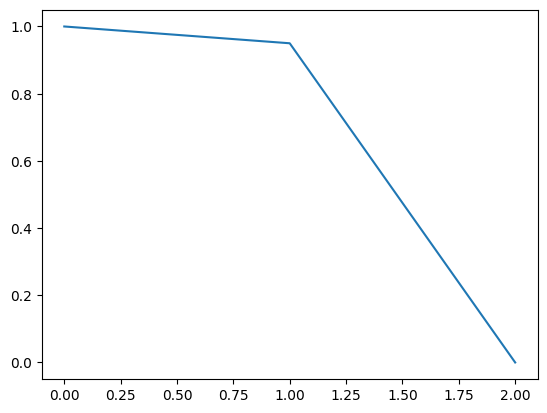

In [53]:
##mixed surface mass transfer

from scipy.optimize import fsolve
import tools.molten_salts as ms
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton_krylov
import tools.liquid_metals as lm
c0=1

K_H=1
D=1E-11
K_S=1
k_t=0.25E8
thick=1E-6
k_d=1E-4
k_r=(k_d)*K_S**2
H=ms.H(k_t,K_H,k_d)

W=ms.W(k_d=k_d, D=D, thick=thick, K_S=K_S, P_H2=c0/K_H)
print("W",W)
print("H",H)
print("W/H",W/H)

from calendar import c
def equations(vars):
    c_wl = vars
    k_r=(k_d)*K_S**2
    c_bl=c0
    #J_mt=2*k_t*(c_bl-c_wl)
    
    J_d=k_d*(c_bl/K_H)-k_r*(c_wl**2)
    J_diff=D/thick*(K_S*((c_wl/K_H))**0.5)
    eq1 = J_d/J_diff-1
    
    
    return [eq1]

initial_guess = [(1E-10)]
solution = newton_krylov(equations, initial_guess,maxiter=int(1E5), method='gmres')
#solution=fsolve(equations, initial_guess, xtol=1e-8)
# # Check if the solution converged
# if ier != 1:
#     print(f"fsolve did not converge. The reason is: {msg}")
# else:
#     print("fsolve successfully converged.")
c_wl=solution[0]
c_bl=c0
J_mt=2*k_t*(c_wl-c_bl)

J_d=k_d*(c_wl/K_H)-k_r*(c_wl**2)
J_diff=D*K_S/thick*((c_wl/K_H)**0.5)
print("Solution:", c_wl)
print("J_mt",J_mt)
print("J_surf",J_d  )
print("J_surf",J_diff)
P_Hb=c0/K_H
P_Hlw=c_wl/K_H
plt.plot([0,1,2],[P_Hb,P_Hlw,0])



W 5.0
H 1.0
W/H 5.0
Solution: 0.9138812427873941
J_mt -0.17223751442521174
J_surf 0.9138812427873941


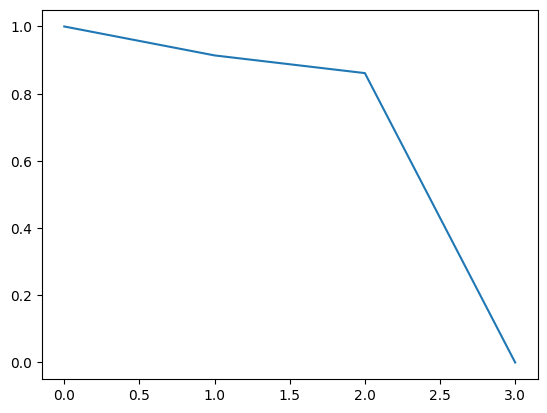

In [54]:
##mixed surface mass transfer

from scipy.optimize import fsolve
import tools.molten_salts as ms
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton_krylov
import tools.liquid_metals as lm
c0=1
k_r=1
K_H=1
D=2E-4
K_S=1
k_t=1
thick=1E-3
k_d=1
H=ms.H(k_t,K_H,k_d)

W=lm.W(k_r=k_r, D=D, thick=thick, K_S=K_S, P_H2=c0/K_H)
print("W",W)
print("H",H)
print("W/H",W/H)

from calendar import c
def equations(vars):
    c_wl,c_ws = vars
    
    c_bl=c0
    J_mt=2*k_t*(c_bl-c_wl)
    
    J_d=k_d*(c_wl/K_H)-k_d*K_S*(c_ws**2)
    J_diff=D/thick*(K_S*c_ws)
    eq1 = J_mt/J_d-1
    eq2 = J_mt/J_diff-1
    
    return [eq1,eq2]

initial_guess = [(2*c0/3),(c0/3)]
solution = newton_krylov(equations, initial_guess,maxiter=int(1E5), method='bicgstab')
#solution=fsolve(equations, initial_guess, xtol=1e-8)
# # Check if the solution converged
# if ier != 1:
#     print(f"fsolve did not converge. The reason is: {msg}")
# else:
#     print("fsolve successfully converged.")
c_wl=solution[0]
c_bl=c0
J_mt=2*k_t*(c_wl-c_bl)

J_d=k_d*(c_wl/K_H)
J_diff=-D*K_S/thick*((c_wl/K_H)**0.5)
print("Solution:", c_wl)
print("J_mt",J_mt)

print("J_surf",J_d)
P_Hb=c0/K_H
P_Hlw=c_wl/K_H
P_Hls=solution[1]/K_H
plt.plot([0,1,2,3],[P_Hb,P_Hlw,P_Hls,0])

